# 3. 成長過程の根のセグメンテーション結果を全て重ね合わせ

ノイズ除去後の画像から成長過程の根を全て重ね合わせた画像（pileup）を生成

In [1]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def find_largest_contour(contours):
    """入力contourのlistから最大面積のcontourを返す"""
    max_idx = -1
    max_area = 0
    for i, cnt in enumerate(contours):
        if cv2.contourArea(cnt) > max_area:
            max_idx = i
            max_area = cv2.contourArea(cnt)
    cnt = contours[max_idx]
    return cnt

def remove_noise(img, largest_cnt=None):
    """最大長のcontourでマスクし，ノイズを除去したimgを返す"""
    if not largest_cnt:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(gray,1,255,0)
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        largest_cnt = find_largest_contour(contours)

    blk = np.zeros(img.shape, np.uint8)
    mask = cv2.drawContours(blk, [largest_cnt], 0, (255, 255, 255), -1)
    noise_removed_img = cv2.bitwise_and(img, mask)
    return noise_removed_img


In [13]:
import re
from os.path import basename

paths = sorted(glob('../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/*'))
prev_root = ''

for path in paths:
    root = re.findall('(P_.+)_.+_.+_', basename(path))[0]
    if prev_root != root:
        print(root)
        prev_root = root
        base_img = cv2.imread(path)
        base_img = remove_noise(base_img)
        cv2.imwrite(path.replace('transformed_seg_noise_removed_ogstep', 'pre_noise_removing_pileup_ogstep'), base_img)
        continue

    img = cv2.imread(path)
    base_img = cv2.bitwise_or(base_img, img)
#     base_img = remove_noise(bitwise_or)
    cv2.imwrite(path.replace('transformed_seg_noise_removed_ogstep', 'pre_noise_removing_pileup_ogstep'), base_img)
    
    

paths

P_Pe2


['../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/P_Pe2_06d_IMG_9392.png',
 '../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/P_Pe2_08d_IMG_9410.png',
 '../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/P_Pe2_10d_IMG_9428.png',
 '../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/P_Pe2_11d_IMG_9437.png',
 '../data/P_Pe2_o/transformed_seg_noise_removed_ogstep/P_Pe2_13d_IMG_9455.png']

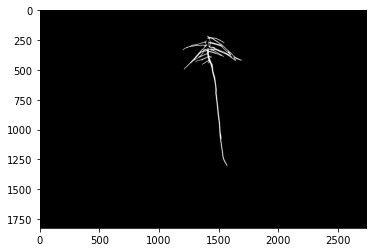

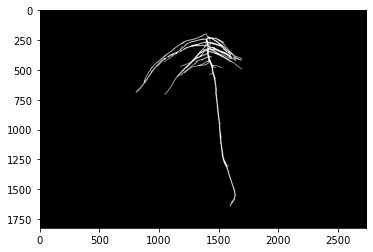

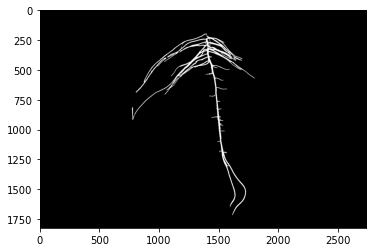

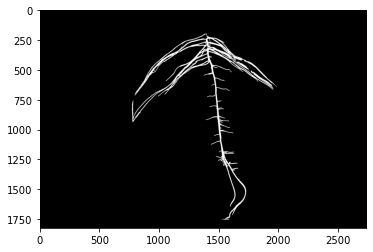

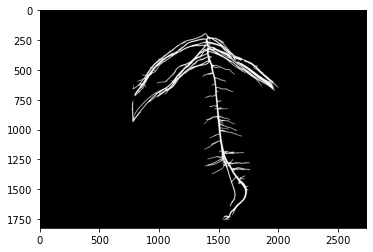

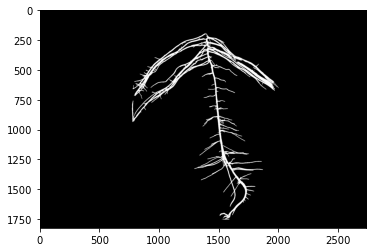

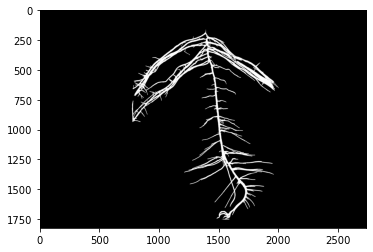

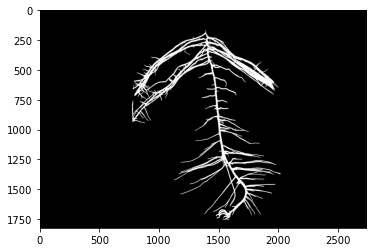

In [6]:



base_img = cv2.imread(paths[0])
for path in paths[1:]:
    img = cv2.imread(path)
    base_img = cv2.bitwise_or(base_img, img)
    cv2.imwrite(path.replace('transformed_seg_noise_removed', 'pileup'), base_img)
    plt.imshow(base_img)
    plt.show()